# Learn how to make cut

Tunnell, Feburary 2016

This tutorial illustrates the steps involved in designing a cut.

The following line just runs our standard code for every analysis.  You can change 'run' to 'load' to see what is in there.

In [1]:
%matplotlib inline
%run boiler_plate.py
import hax  # rootpy raises a warning, but ignore

/Users/tunnell/anaconda3/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
## Specify your own data location
hax.config.CONFIG['main_data_paths'] = ['/tmp/data/']
hax.runs.update_datasets()

In [4]:
D = hax.runs.get_datasets()

In [5]:
D[D['name'] == 'xe100_110210_1100']['location'].values[0]

'/tmp/data/xe100_110210_1100.root'

## Load data

Here are the sources we have:

In [12]:
datasets = hax.runs.DATASETS.query('source == "AmBe" & category == "standard" & tpc == "xenon100" & location != ""')['name'].values

In [54]:
print(datasets)

['xe100_110210_1100' 'xe100_110210_1412' 'xe100_110211_0532']


In [58]:
" ".join(hax.runs.DATASETS.query('source == "Co60" & category == "standard" & tpc == "xenon100" & location==""')['name'].values)

'xe100_110315_1334 xe100_110315_1844 xe100_110315_2142 xe100_110316_0206 xe100_110316_0609 xe100_110319_0948 xe100_110319_1302 xe100_110319_1630 xe100_110319_2016 xe100_110320_1715 xe100_110320_2040 xe100_110321_0014 xe100_110321_0354 xe100_110321_0729 xe100_110323_1114 xe100_110323_1156 xe100_110323_1515 xe100_110323_1924 xe100_110323_2247 xe100_110324_0230 xe100_110324_0610 xe100_110324_0947 xe100_110405_1844 xe100_110405_2312 xe100_110406_0320 xe100_110406_0751 xe100_110406_1203 xe100_110406_1602 xe100_110406_2005 xe100_110406_2354 xe100_110407_0352 xe100_110407_0752 xe100_110414_1640 xe100_110415_0117 xe100_110415_0130 xe100_110415_0546 xe100_110415_1009 xe100_110418_1709 xe100_110418_2117 xe100_110419_0125 xe100_110419_0547 xe100_110419_1009 xe100_110421_1152 xe100_110421_1552 xe100_110421_2003 xe100_110422_0018 xe100_110422_0500 xe100_110425_1210 xe100_110425_1614 xe100_110425_2018 xe100_110426_0016 xe100_110426_0429 xe100_110505_1158 xe100_110505_1517 xe100_110505_1858 xe100_110

Load

In [ ]:
class Timing(hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['peaks.hit_time_mean']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(s1_n_hits=s1.n_hits,
                    s2_n_hits=s2.n_hits)
    
class Width(hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['peaks.n_hits']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(s1_n_hits=s1.n_hits,
                    s2_n_hits=s2.n_hits)


In [13]:
df = hax.minitrees.load(datasets, force_reload=True)

Found minitree at ./xe100_110210_1100_Basics.root
Created minitree Basics for dataset xe100_110210_1100
Found minitree at ./xe100_110210_1412_Basics.root
Created minitree Basics for dataset xe100_110210_1412
Found minitree at ./xe100_110211_0532_Basics.root
Created minitree Basics for dataset xe100_110211_0532


## Cuts

Here are the cuts

In [32]:
cut_single_s1 = (df['largest_other_s1'] == 0)
cut_single_s2 = (df['largest_other_s2'] > 0)
cut_radius = (np.sqrt(df['x']**2 + df['y']**2) < 12)
cut_z = (df['z'] < -5) & (df['z'] > -27)
cut_fiducial = (cut_radius & cut_z)
df = df[cut_single_s1 & cut_single_s2 & cut_fiducial]

What are the variables we can use for isolating anomalous populations?

In [33]:
df.head()

,index,cs1,cs2,dataset_number,drift_time,event_number,event_time,largest_coincidence,largest_other_s1,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z
2,2,4.246333,488.037578,1102101100,123562.687500,2,1297332001054971904,0,0,300.855682,0,0.000000,5.172802,0.000000,370.854065,0.566815,0.560377,-7.783019,-21.376345
11,11,2018.945822,604680.798305,1102101100,128107.085938,11,1297332001459582976,0,0,130654.843750,0,51.746433,2719.090332,0.106249,454873.031250,0.316242,-6.911321,1.058491,-22.162525
44,44,5.126339,1029.480176,1102101100,82060.914062,44,1297332002172581120,0,0,57.242573,0,0.000000,4.607438,0.000000,857.869263,0.544987,-8.654717,7.160378,-14.196538
53,53,13.035884,1209.878189,1102101100,119342.414062,53,1297332002479382016,0,0,842.633728,0,0.000000,16.164530,0.000000,928.035156,0.510997,-1.183019,3.673585,-20.646238
72,72,4.971781,921.915764,1102101100,94018.921875,72,1297332003064935936,0,0,360.871063,0,0.000000,4.749982,0.239160,748.089722,0.578682,11.394340,-1.805660,-16.265272


Inspect $(x,y)$

In [40]:
df['largest_other_s2'].describe()

count     11048.000000
mean      14958.259213
std       42350.293610
min           5.998852
25%          87.789963
50%         353.002335
75%        1053.362915
max      750912.125000
Name: largest_other_s2, dtype: float64

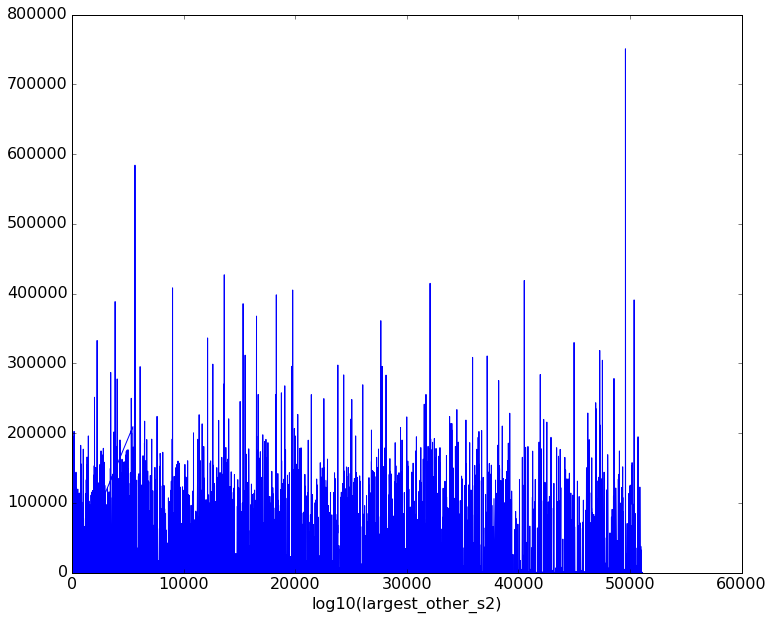

In [53]:
plt.scatter(df['largest_other_s2'],
            )
plt.xlabel('log10(largest_other_s2)')

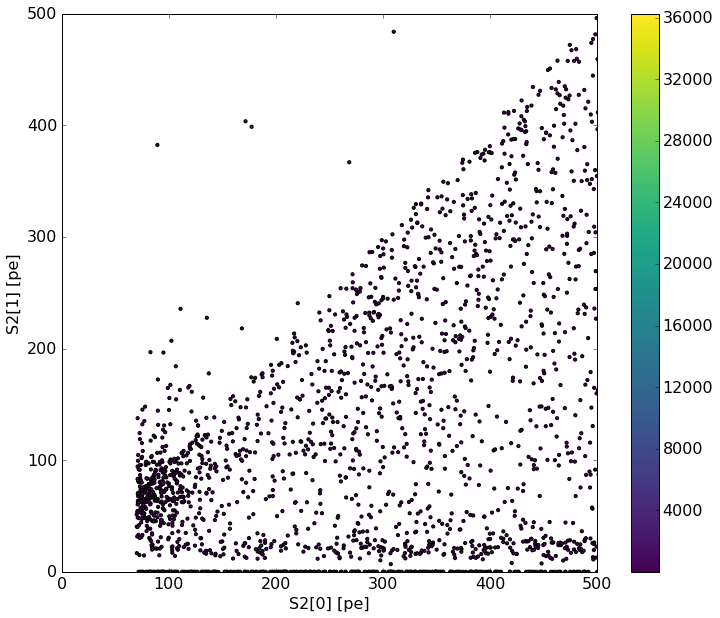

In [17]:
plt.scatter(df['s2'],
            df['largest_other_s2'],
            c=df['cs1'],
            marker='o', s=10)
plt.colorbar()
plt.xlim(0,500)
plt.ylim(0,500)
plt.xlabel('S2[0] [pe]')
plt.ylabel('S2[1] [pe]')
plt.show()

Inspect $(r,z)$.

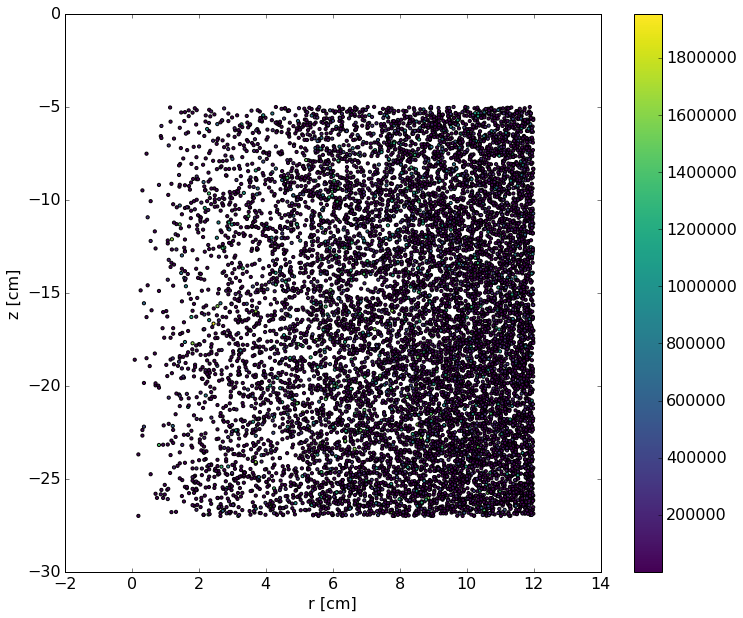

In [18]:
plt.scatter(df['s2'],
            df['largest_other_s2'],
            c=df['cs1'],
            marker='o', s=10)
plt.colorbar()
plt.xlim(0,500)
plt.ylim(0,500)
plt.xlabel('S2[0] [pe]')
plt.ylabel('S2[1] [pe]')
plt.show()

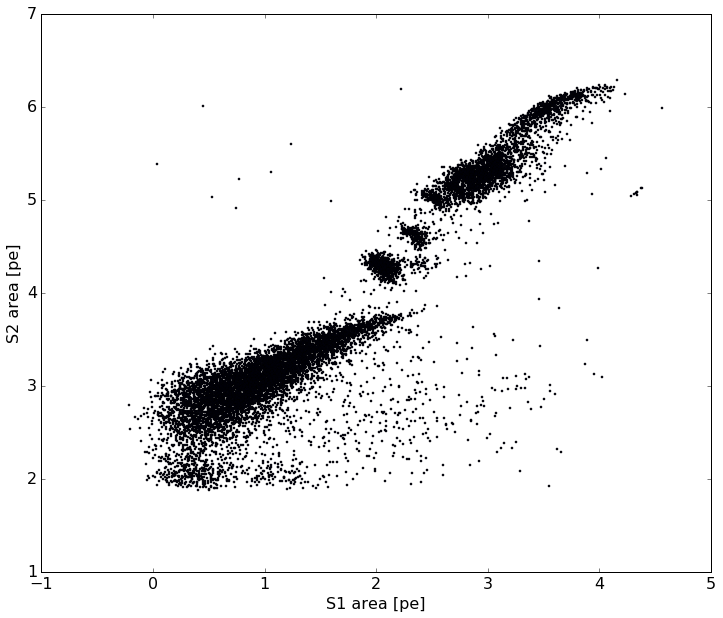

In [19]:
plt.scatter(np.log10(df['cs1']),
            np.log10(df['cs2']),
            marker='.',
            s=10,
            alpha=1)

plt.xlabel('S1 area [pe]')
plt.ylabel('S2 area [pe]')

plt.show()

In [ ]:
df_40kev = df[(df['cs1'] > 50) & (df['cs1'] < 200) & (df['cs2'] > 15000) & (df['cs2'] < 32000)]

plt.scatter(df_40kev['cs1'],
            df_40kev['cs2'], marker='.')
plt.title('40 keV')
#plt.xlim(0, 250) # S1
#plt.ylim(8000, 25000*2) # S2

plt.xlabel('S1 area [pe]')
plt.ylabel('S2 area [pe]')

plt.show()

In [ ]:
print('S1 (40 keV) pe:', df_40kev['cs1'].mean(), '+/-', df_40kev['cs1'].std())
print('S2 (40 keV) pe:', df_40kev['cs2'].mean(), '+/-', df_40kev['cs2'].std())

In [ ]:
print('S1 pe/keV:', df_40kev['cs1'].mean()/40)
print('S2 pe/keV:', df_40kev['cs2'].mean()/40)

In [ ]:
df_peaks = df[(df['cs1'] > 50) & (df['cs1'] < 500) & (df['cs2'] > 15000) & (df['cs2'] < 300e5)]

In [ ]:
# concatenate the two datasets into the final training set
X_train = np.dstack((df_peaks.to_records()['cs1'],
                     df_peaks.to_records()['cs2']))[0]

# fit a Gaussian Mixture Model with two components
clf = mixture.GMM(n_components=3, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(df_peaks['cs1'].min(),
                df_peaks['cs1'].max())
                
y = np.linspace(df_peaks['cs2'].min(),
                df_peaks['cs2'].max())
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)[0]
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, #norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(1, 2, 100))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [ ]:
clf.means_

In [ ]:
df_pid = df[(150 < df['s2_area']) & (10000 > df['s2_area'])]
plt.scatter(df_pid['s1_area'], df_pid['pid'], marker='.', alpha=0.1, s=5,
            color='red', label='NR band')
plt.scatter(df_40kev['s1_area'], df_40kev['pid'], marker='.', alpha=1.0, s=5,
            color='blue', label='40 keV $\gamma$')
plt.legend()
plt.xlabel('Corrected S1 [pe]')
plt.ylabel('log10(S2/s1)')
plt.xlim(0, 220)
plt.ylim(1,4)

In [ ]:
df_inspect = df_pid[df_pid['pid'] < 1.0]


In [ ]:
df_40kev['xed'] = df_40kev['dataset_name']

In [ ]:
df_40kev['dataset_name'] = [x[:-11] for x in df_40kev['dataset_name']]

In [ ]:
df_40kev.head()

In [ ]:
def inspect_event(df_event):
    mypax = core.Processor(config_names='XENON100',
                           config_dict={'pax': {
                 'output': ['Plotting.PlotEventSummary'],
                'input_name':   ('/Users/tunnell/XENON/data/xenon100/run_10/%s/%s' % (df_event['dataset_name'],
                                                                                       df_event['xed'])),
                'events_to_process': [df_event['event_number']],          
                'output_name': 'SCREEN'}})

    mypax.run()

In [ ]:
inspect_event(df_40kev.iloc[0])